In [ ]:
!pip install google-play-scraper




     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.2-py3-none-any.whl size=24393 sha256=6e1636d95d2495e04e4ef9ed41b0202ec7e5034ecf0bd5c9842aa6c466b4507a
  Stored in directory: /root/.cache/pip/wheels/98/99/eb/bbb9d24a5c526980647efc10336eaaeffcf07749f581111128
Successfully built google-play-scraper


In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format= 'retina'
sns.set(style= 'whitegrid', palette= 'muted', font_scale=1.2)



In [ ]:
app_packages = [
                'com.anydo',
                'com.todoist',
                'com.ticktick.task',
                'com.habitrpg.android.habitica',
                'cc.forestapp',
                'com.oristats.habitbull',
                'com.levor.liferpgtasks',
                'com.habitnow',
                'com.microsoft.todos',
                'prox.lab.calclock',
                'com.gmail.jmartindev.timetune',
                'com.artfulagenda.app',
                'com.tasks.android',
                'com.appgenix.bizcal',
                'com.appxy.planner'
]




In [ ]:
len(app_packages)

15

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap,lang= 'en', country = 'us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.84it/s]


In [ ]:
def print_json(json_object):

  json_str = json.dumps(
      json_object,
      indent= 2,
      sort_keys = True,
      default = str

  )

  print(highlight(json_str, JsonLexer(), TerminalFormatter()))


In [ ]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support

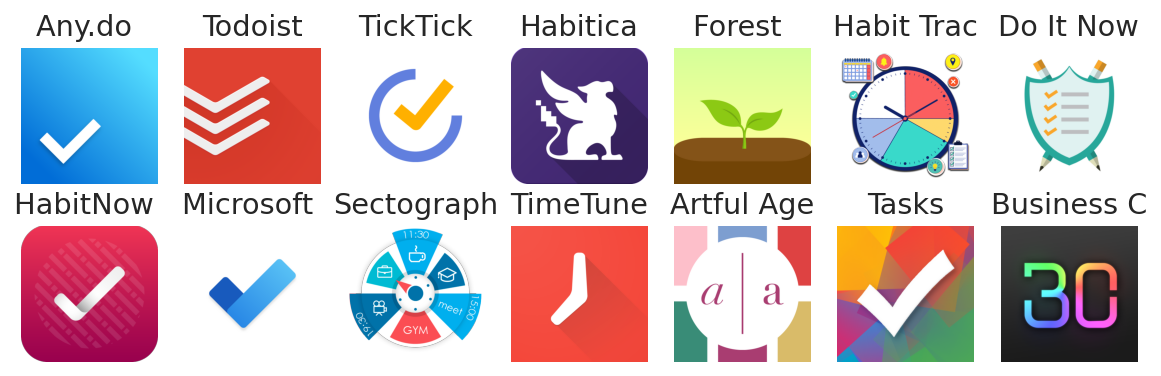

In [ ]:
def format_title(title):

  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) //2, figsize = (10,3))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)

In [ ]:
app_infos_df.head(2)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,similarApps,moreByDeveloper,appId,url
0,"Any.do - To do list, planner & calendar","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,4.532634,400141,134289,"[18900, 6416, 18670, 54821, 301334]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n156 Begin St. 22nd floor, Tel A...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1628143078,Varies with device,What's new?\r\n- Filters! You can now filter y...,What&#39;s new?<br>- Filters! You can now filt...,False,"[com.splendapps.splendo, com.todoist, com.micr...",None,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,“The best to-do list app right now” - The Verg...,“The best to-do list app right now” - The Verg...,"10,000,000+",10000000,4.534327,231462,69453,"[10893, 3877, 8914, 34749, 173029]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/privacy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1633466956,Varies with device,Small touch-ups are keeping Todoist looking an...,Small touch-ups are keeping Todoist looking an...,False,"[com.anydo, com.fenchtose.reflog, com.microsof...",None,com.todoist,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv('apps.csv', index = None, header= True)

In [ ]:
### GET THE APP REVIEWS####

In [ ]:
app_reviews = [] 

for ap in tqdm(app_packages):
  for score in (range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs = reviews(
          ap,
          lang='en',
          country = 'us',
          sort = sort_order,
          count= 200 if score ==3 else 100,
          filter_score_with = score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)



  0%|          | 0/15 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
print_json(app_reviews[0])

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

In [ ]:
app_reviewsdf.head()

In [ ]:
app_reviews+df.to_csv('reviews.csv', index = None, header = True)